In [200]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path('/content/drive/MyDrive/data')

# Analiza i przetwarzanie danych na temat Titanica

Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.

Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

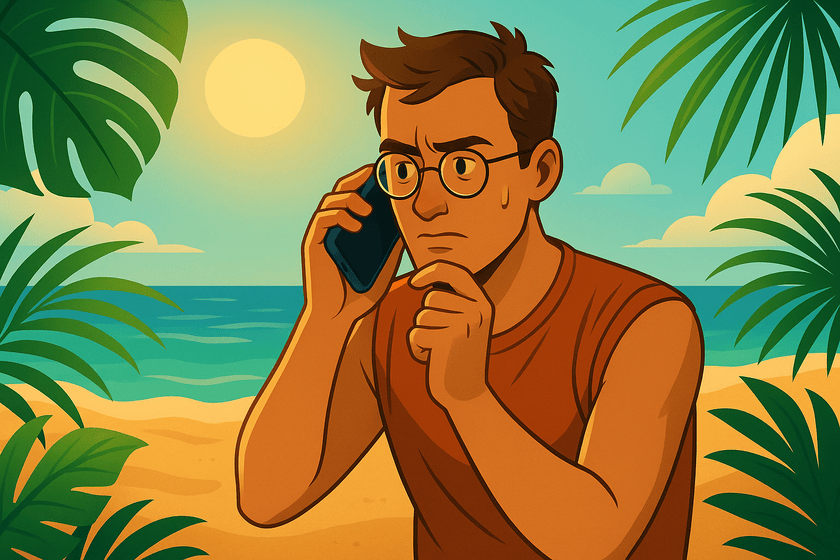

(*AI-generated image*)


Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


# Podstawowa analiza danych

In [202]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [203]:
titanic_df.shape

(891, 11)

In [204]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [205]:
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


Czy typy danych są odpowiednie do znaczenia kolumny?
Myślę, że zdecydowana większość tak. Jednak nie pasuje mi:
- zmienna 'Sex' jako 'object', zmieniłabym ją na zmienną binarną 0-1.

In [206]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [207]:
titanic_df['Sex'] = titanic_df.Sex.map({'male': 0, 'female':1})

# Brakujące wartości


Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz?


In [208]:
titanic_na = titanic_df.isna().sum(axis=0)
titanic_na

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,98
Cabin,687


Brakujące wartości występują tylko w kolumnach: 'Age', 'Fare', 'Cabin', 'Embarked'. Myślę, że największym problemem jest spory brak danych dla kolumny odpowiadającej wiekowi pasażerów - jest to kluczowy czynnik jeśli chodzi o np. wytrzymałość organizmu. Bardzo duży brak danych jest w kolumnie 'Cabin', najpierw zobaczę jakie wartości zawiera ogólnie ta kolumna i czy są one istotne dla zadania.

## 'Cabin' + 'KnownCabin'

In [209]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Numer kabiny jest dwuczłonowy - składa się z litery i liczb. Sprawdzę, czy istnieje konkretne powiązanie między numerem kabiny a klasą w której podróżny miał miejsce.

In [210]:
titanic_A = titanic_df[titanic_df['Cabin'].str.startswith('A', na = False)][['Pclass', 'Cabin']]
titanic_A.groupby('Pclass')['Cabin'].count()

,Cabin
Pclass,
1,15


Kabiny z przedrostkiem 'A' występują tylko w 1 klasie.

In [211]:
titanic_B = titanic_df[titanic_df['Cabin'].str.startswith('B', na = False)][['Pclass', 'Cabin']]
titanic_B.groupby('Pclass')['Cabin'].count()

,Cabin
Pclass,
1,47


Kabiny z przedrostkiem 'B' występują tylko w 1 klasie. Robienie tego manualnie jest bardzo męczące więc postaram się zrobić wszystko za jednym razem:

In [212]:
titanic_df['Cabin'].str[0].value_counts()

,count
Cabin,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [213]:
titanic_df['Deck'] = titanic_df['Cabin'].str[0]
titanic_df.groupby(['Deck','Pclass'])['Cabin'].count()

Deck  Pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4
T     1          1
Name: Cabin, dtype: int64

In [214]:
titanic_na['Cabin']/len(titanic_df)

np.float64(0.7710437710437711)

Podsumowując: kabiny 'A', 'B', 'C' i 'T' znajdują się tylko w 1 klasie, kabiny 'D' w 1 i 2 klasie, kabiny 'E' w 1,2 i 3 klasie, kabiny 'F' w 2 i 3 klasie a kabiny 'G' tylko w 3 klasie. Zależność jakaś występuje. Podczas usuwania wartości NAN z kolumny 'Cabin' sugerowałabym się klasą przypisaną danemu wierszowi, jednak biorąc pod uwagę, żę brakuje 77% danych o kabinie, dodam nową etykietę - "unknown". Mam zbyt mało danych o przynależności kabin do klas aby się tym posłużyć przy uzupełnianiu NAN.

In [215]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')
titanic_df['Deck'] = titanic_df['Deck'].fillna('Unknown')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,Unknown
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Unknown
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,Unknown,S,Unknown
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,Unknown,S,Unknown


In [216]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

get_column_distribution(titanic_df, 'Cabin')

,proportion
Cabin,
Unknown,0.771044
G6,0.004489
C23 C25 C27,0.004489
B96 B98,0.004489
F2,0.003367
...,...
E17,0.001122
A24,0.001122
C50,0.001122


Dodam jeszcze zmienną, która da nam znać czy kabina pasażera była znana - może ma to wpływ na przeżycie?

In [217]:
titanic_df['KnownCabin'] = (titanic_df['Cabin'] != 'Unknown').astype(int)

Jeśli chodzi o wiek i uzupełnianie NAN - najpierw zbadam czy istnieje jakiś dominujący.

## 'Age'

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
age_df = titanic_df['Age']
age_df.describe(include = 'all')

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [219]:
age_df.mode()

,Age
0,24.0


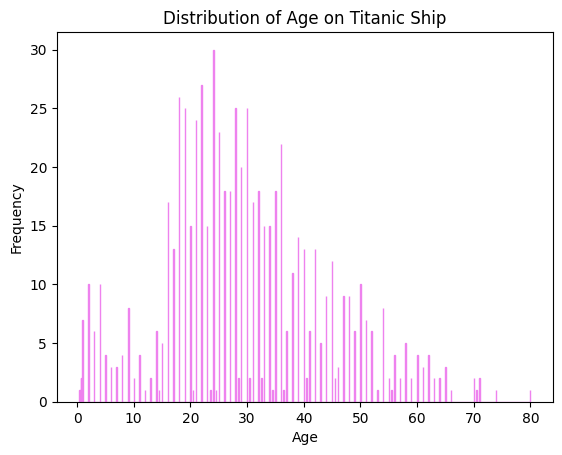

In [220]:
plt.hist(titanic_df['Age'], bins=len(titanic_df), color='violet', edgecolor='violet')
plt.title('Distribution of Age on Titanic Ship')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [221]:
titanic_na['Age']/len(titanic_df)

np.float64(0.19865319865319866)

20% danych o wieku pasażerów to NAN - nie jest to większość. Z drugiej strony, co piąty pasażer nie podał swojego wieku - jest to sporo ludzi. Średnia wynosi 29.7, moda 24, mediana 28. Teoretycznie rzecz biorąc wykres przypomina dzwon rozkładu normalnego (jednakże z dziurą w obszarze lat nastoletnich), a średnia i mediana są zbliżone. Wiek może być połączony z faktem posiadania małżonka/dzieci. Niestety liczba dzieci jest zsumowana z liczbą rodzeństwa (kolumna 'SibSp'), a liczba małżonków z liczbą rodziców (kolumna 'Parch'). Biorąc pod uwagę ten fakt, nic nam to nie mówi o wieku: 1 w kolumnie 'Parch' może oznaczać jedno dziecko albo jednego rodzica - brak korelacji z wiekiem. Podsumowując - NAN w 'Age' uzupełnie posługując się medianą/średnią/modą, jednak najpierw postaram się znaleźć inne zależności, które pomogą mi uzupełnić brakujące wartości dla tej zmiennej. Zacznę od 'Pclass'- być może ludzie podróżujący pierwszą klasą są starsi?

In [222]:
first_class = titanic_df[titanic_df['Pclass'] == 1]
second_class = titanic_df[titanic_df['Pclass'] == 2]
third_class = titanic_df[titanic_df['Pclass'] == 3]

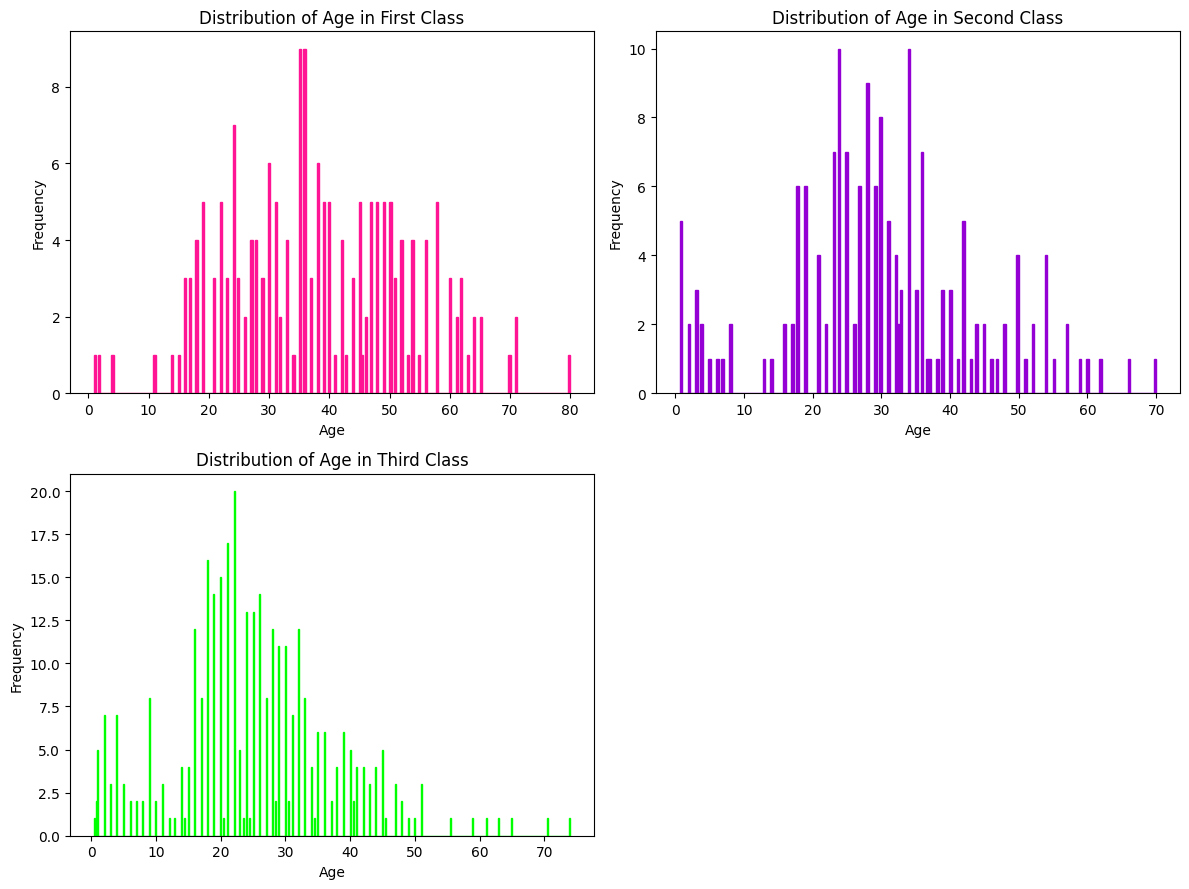

In [223]:
plt.figure(figsize = (12,9))

plt.subplot(2,2,1)
plt.hist(first_class['Age'], bins = len(first_class), color = 'deeppink', edgecolor = 'deeppink')
plt.title('Distribution of Age in First Class')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(second_class['Age'], bins = len(second_class), color = 'darkviolet', edgecolor = 'darkviolet')
plt.title('Distribution of Age in Second Class')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(third_class['Age'], bins = len(third_class), color = 'lime', edgecolor = 'lime')
plt.title('Distribution of Age in Third Class')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [224]:
first_class['Age'].describe(include='all')

,Age
count,186.000000
mean,38.233441
std,14.802856
min,0.920000
25%,27.000000
50%,37.000000
75%,49.000000
max,80.000000


In [225]:
second_class['Age'].describe(include = 'all')

,Age
count,173.000000
mean,29.877630
std,14.001077
min,0.670000
25%,23.000000
50%,29.000000
75%,36.000000
max,70.000000


In [226]:
third_class['Age'].describe(include = 'all')

,Age
count,355.000000
mean,25.140620
std,12.495398
min,0.420000
25%,18.000000
50%,24.000000
75%,32.000000
max,74.000000


Dla każdej klasy 'Pclass' osobno (1,2,3) średnia wieku jest praktycznie równa medianie wieku, a rozkłady bardzo przypominają normalne. Dla 'bezpieczeństwa' jednak posłużę się medianą przy uzupełnianiu NAN.

In [227]:
titanic_df.loc[(titanic_df['Age'].isna()) & (titanic_df['Pclass'] == 1), 'Age'] = first_class['Age'].median()
titanic_df.loc[(titanic_df['Age'].isna()) & (titanic_df['Pclass'] == 2), 'Age'] = second_class['Age'].median()
titanic_df.loc[(titanic_df['Age'].isna()) & (titanic_df['Pclass'] == 3), 'Age'] = third_class['Age'].median()

Podzielę również 'Age' na konkretne etapy życia człowieka, sprawdzę potem jak to się odnosi do przeżywalności.

In [228]:
titanic_df['Age'].astype(float)

,Age
PassengerId,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0
...,...
887,27.0
888,19.0
889,24.0


In [229]:
def assign_life_phase(age):
    if 0 <= age < 2:
        return 'Infant'
    elif 2 <= age < 4:
        return 'Toddler'
    elif 4 <= age < 6:
        return 'Preschooler'
    elif 6 <= age < 13:
        return 'Child'
    elif 13 <= age < 18:
        return 'Teen'
    elif 18 <= age < 26:
        return 'Young Adult'
    elif 26 <= age < 40:
        return 'Adult'
    elif 40 <= age < 60:
        return 'Middle-aged'
    elif 60 <= age < 75:
        return 'Senior'
    elif age >= 75:
        return 'Elderly'
    else:
        return 'Unknown'

In [230]:
titanic_df['LifePhase'] = titanic_df['Age'].apply(assign_life_phase)
titanic_df.groupby(['Survived', 'LifePhase'])['Survived'].count()

Survived  LifePhase  
0         Adult          168
          Child           16
          Infant           2
          Middle-aged     83
          Preschooler      3
          Senior          19
          Teen            23
          Toddler          8
          Young Adult    227
1         Adult          123
          Child            9
          Elderly          1
          Infant          12
          Middle-aged     54
          Preschooler     11
          Senior           6
          Teen            21
          Toddler          8
          Young Adult     97
Name: Survived, dtype: int64

In [231]:
titanic_df[titanic_df['LifePhase'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,KnownCabin,LifePhase
PassengerId,,,,,,,,,,,,,,


In [232]:
def survival_rate_by_lifephase(df):
    survived_counts = df[df['Survived'] == 1].groupby('LifePhase')['Survived'].count()
    total_counts = df.groupby('LifePhase')['Survived'].count()
    survival_rate = (survived_counts / total_counts * 100).round(2)
    return survival_rate.sort_values(ascending=False)

survival_rate_by_lifephase(titanic_df)

,Survived
LifePhase,
Elderly,100.00
Infant,85.71
Preschooler,78.57
Toddler,50.00
Teen,47.73
Adult,42.27
Middle-aged,39.42
Child,36.00
Young Adult,29.94


Małe dzieci ('Infant', 'Toodler', 'Preschooler') oraz osoby w podeszłym wieku ('Elderly') w większości przeżyły. Najwyraźniej podczas ewakuacji najpierw ratowano tych bezbronnych - małe dzieci i starsze osoby. Jednakże z etykietą 'Elderly' mamy tylko jednego pasażera. Zdecydowana większość starszych osób nie przeżyła (z 26 osób z etykierami 'Elderly' i 'Senior' przeżyło tylko 7).

## 'Copassengers' + 'IsAlone'

Za pomocą zer w kolumnach 'SibSp' i 'Parch' możemy dowiedzieć się czy pasażer podróżował całkowicie sam. Podczas katastrofy jedyne o czym myślał to on sam - może wystąpić silna korelacja pomiędzy podróżą samemu a przetrwaniem. Stworzę więc nową zmienną 'Copassengers'.

In [233]:
total_copassengers = lambda x: x['SibSp'] + x['Parch']
titanic_df['Copassengers'] = titanic_df.apply(total_copassengers, axis=1)
titanic_df.groupby(['Survived','Copassengers'])['Copassengers'].count()

Survived  Copassengers
0         0               374
          1                72
          2                43
          3                 8
          4                12
          5                19
          6                 8
          7                 6
          10                7
1         0               163
          1                89
          2                59
          3                21
          4                 3
          5                 3
          6                 4
Name: Copassengers, dtype: int64

In [234]:
titanic_df['IsAlone'] = (titanic_df['Copassengers'] == 0).astype(int)
titanic_df.groupby(['Survived','IsAlone'])['IsAlone'].count()

Survived  IsAlone
0         0          175
          1          374
1         0          179
          1          163
Name: IsAlone, dtype: int64

Wynik jest szokujący - wręcz przeciwny niż się spodziewałam. Największa grupa przypadków śmiertelnych to ci podróżujący samemu! Fakt posiadania rodziny/małżonków na pokładzie zdecydowanie wpłynął na odsetek przeżycia.

## 'Embarked'

In [235]:
titanic_df.groupby('Embarked')['Embarked'].value_counts()
get_column_distribution(titanic_df, 'Embarked')

,proportion
Embarked,
S,0.724409
C,0.188976
Q,0.086614


Sprawdzę jeszcze czy aspekt finansowy mógł być powiązany z tym, gdzie wsiadali pasażerowie (może jeden z obszarów jest np. skrajnie zamożny?).

<Axes: xlabel='Embarked', ylabel='Fare'>

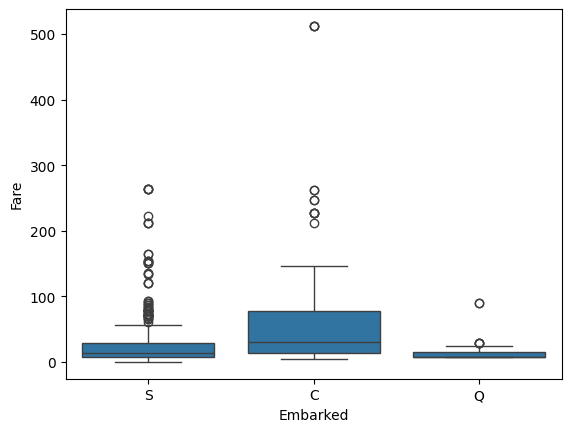

In [236]:
sns.boxplot(data=titanic_df, x='Embarked', y='Fare')

In [237]:
S_passengers = titanic_df[titanic_df['Embarked'] == 'S']
C_passengers = titanic_df[titanic_df['Embarked'] == 'C']
Q_passengers = titanic_df[titanic_df['Embarked'] == 'Q']

In [238]:
S_passengers['Fare'].describe(include = 'all')

,Fare
count,572.000000
mean,27.714560
std,36.866349
min,0.000000
25%,8.050000
50%,13.000000
75%,28.625000
max,263.000000


In [239]:
C_passengers['Fare'].describe(include = 'all')

,Fare
count,153.000000
mean,61.116587
std,86.988797
min,4.012500
25%,13.791700
50%,29.700000
75%,78.266700
max,512.329200


In [240]:
Q_passengers['Fare'].describe(include = 'all')

,Fare
count,66.000000
mean,13.692679
std,15.079522
min,6.750000
25%,7.750000
50%,7.750000
75%,15.500000
max,90.000000


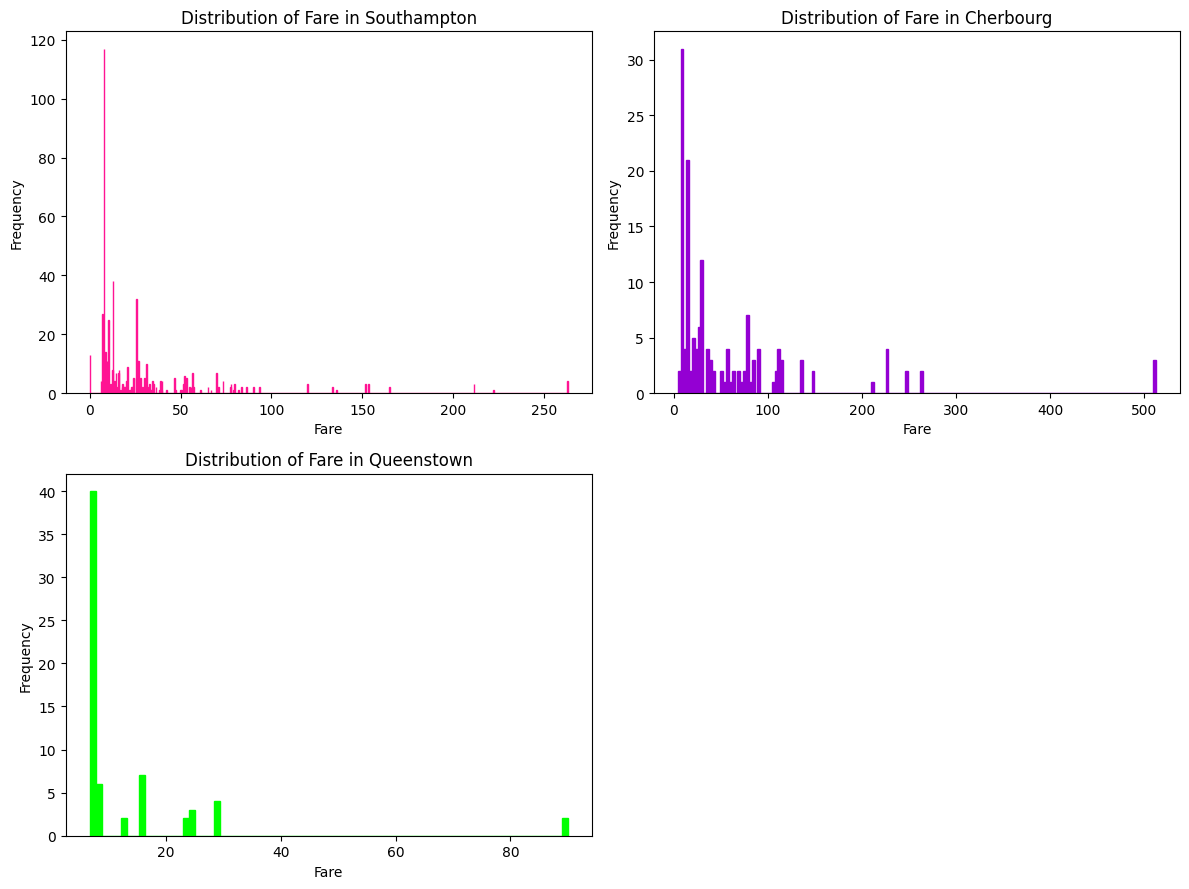

In [241]:
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
plt.hist(S_passengers['Fare'], bins = len(S_passengers), color = 'deeppink', edgecolor = 'deeppink')
plt.title('Distribution of Fare in Southampton')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(C_passengers['Fare'], bins = len(C_passengers), color = 'darkviolet', edgecolor = 'darkviolet')
plt.title('Distribution of Fare in Cherbourg')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(Q_passengers['Fare'], bins = len(Q_passengers), color = 'lime', edgecolor = 'lime')
plt.title('Distribution of Fare in Queenstown')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [242]:
titanic_df[titanic_df['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,KnownCabin,LifePhase,Copassengers,IsAlone
PassengerId,,,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,B,1,Adult,0,1
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,B,1,Senior,0,1


Wartość 'S' dla 'Embarked' zdecydowanie dominuje, jednak cena biletu pasażerów jest z tych wyższych. Największą średnią cenę biletu ma wartość 'C' w 'Embarked', zatem brakujące wartości uzupełnię za pomocą 'C'.

In [243]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('C')

In [244]:
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Ostatnia niezbadana zmienna z obecnymi NAN to 'Fare'. Na pewno cena biletu jest powiązana z klasą podróży. Najpierw sprawdzę relację między zmiennymi 'Pclass' a 'Fare'.

# 'Fare' + 'Pclass'

<Axes: xlabel='Pclass', ylabel='Fare'>

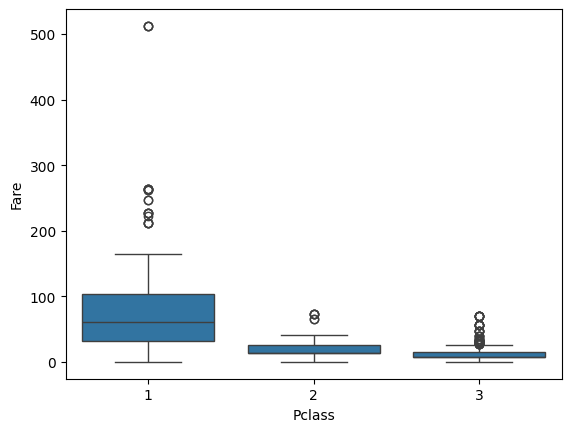

In [245]:
sns.boxplot(data=titanic_df, x='Pclass', y='Fare')

In [246]:
first_class = titanic_df[titanic_df['Pclass'] == 1]
titanic_df['FirstClass'] = (titanic_df['Pclass'] == 1).astype(int)
first_class['Fare'].describe(include = 'all')

,Fare
count,194.000000
mean,86.771177
std,81.123003
min,0.000000
25%,31.330200
50%,60.287500
75%,103.193750
max,512.329200


In [247]:
second_class = titanic_df[titanic_df['Pclass'] == 2]
titanic_df['SecondClass'] = (titanic_df['Pclass'] == 2).astype(int)
second_class['Fare'].describe(include = 'all')

,Fare
count,169.000000
mean,20.489127
std,13.171854
min,0.000000
25%,13.000000
50%,14.000000
75%,26.000000
max,73.500000


In [248]:
third_class = titanic_df[titanic_df['Pclass'] == 3]
titanic_df['ThirdClass'] = (titanic_df['Pclass'] == 3).astype(int)
third_class['Fare'].describe(include = all)

,Fare
count,430.000000
mean,13.886074
std,12.142212
min,0.000000
25%,7.750000
50%,8.050000
75%,15.537500
max,69.550000


Jeśli chodzi o NAN w fare, to posłużę się medianą dla każdej z klas, ponieważ rozkłady są niesymetryczne.

In [249]:
titanic_df.loc[(titanic_df['Fare'].isna()) & (titanic_df['Pclass'] == 1), 'Fare'] = first_class['Fare'].median()
titanic_df.loc[(titanic_df['Fare'].isna()) & (titanic_df['Pclass'] == 2), 'Fare'] = second_class['Fare'].median()
titanic_df.loc[(titanic_df['Fare'].isna()) & (titanic_df['Pclass'] == 3), 'Fare'] = third_class['Fare'].median()

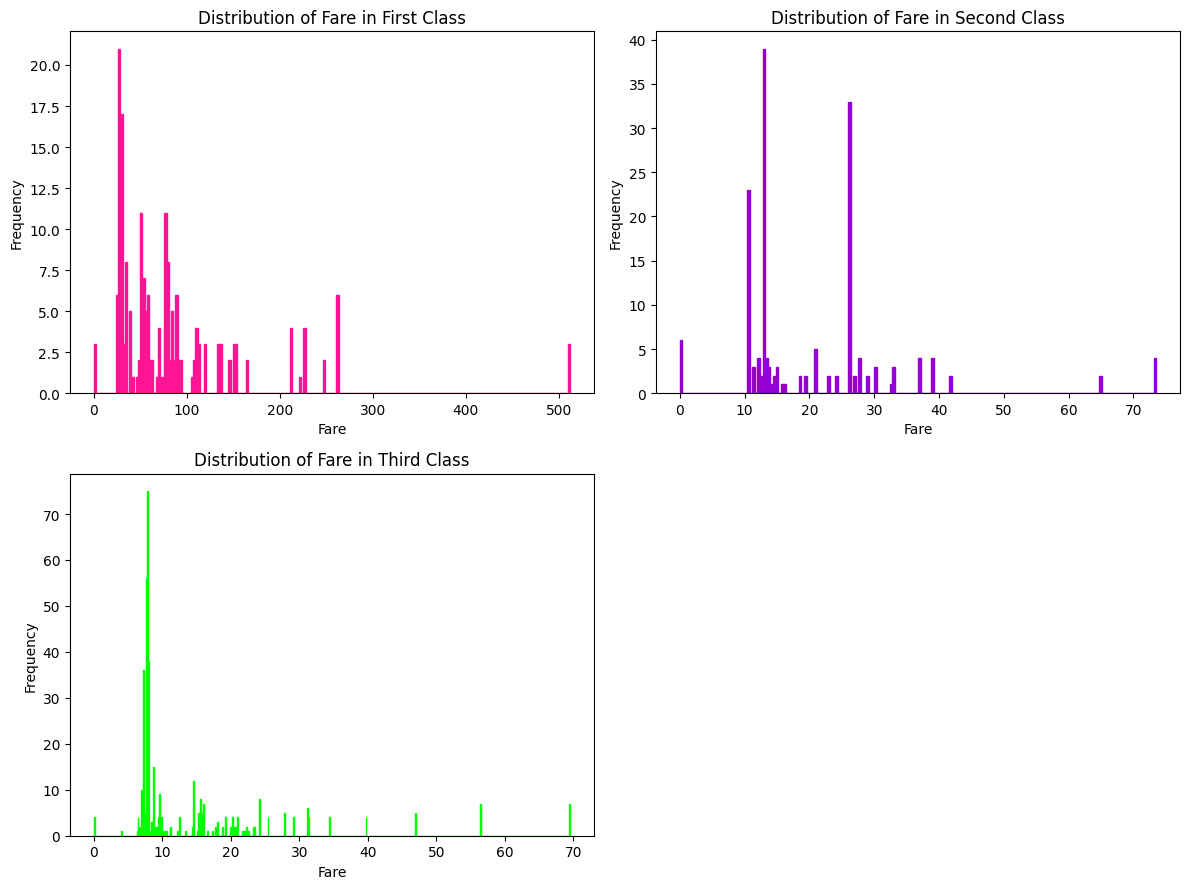

In [250]:
plt.figure(figsize=(12, 9))

plt.subplot(2,2,1)
plt.hist(first_class['Fare'], bins = len(first_class), color = 'deeppink', edgecolor = 'deeppink' )
plt.title('Distribution of Fare in First Class')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(second_class['Fare'], bins = len(second_class), color = 'darkviolet', edgecolor = 'darkviolet')
plt.title('Distribution of Fare in Second Class')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(third_class['Fare'], bins = len(third_class), color = 'lime', edgecolor = 'lime')
plt.title('Distribution of Fare in Third Class')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Wszystkie wartości brakujące zostały uzupełnione. Zwizualizuję teraz zależności między zmienną 'Survived' a pozostałymi zmiennymi, które mogą mieć związek z odsetkiem przeżycia.

# Zależności z 'Survived'

In [251]:
titanic_df.groupby('Survived')['Survived'].count()

,Survived
Survived,
0,549
1,342


Text(0, 0.5, 'Count')

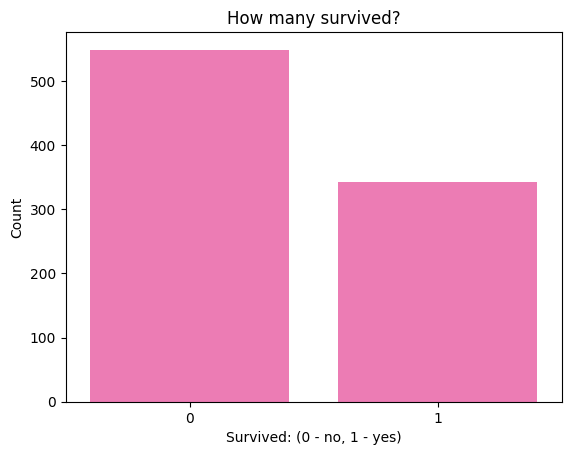

In [252]:
sns.countplot(data=titanic_df, x='Survived', color='hotpink')
plt.title('How many survived?')
plt.xlabel('Survived: (0 - no, 1 - yes)')
plt.ylabel('Count')

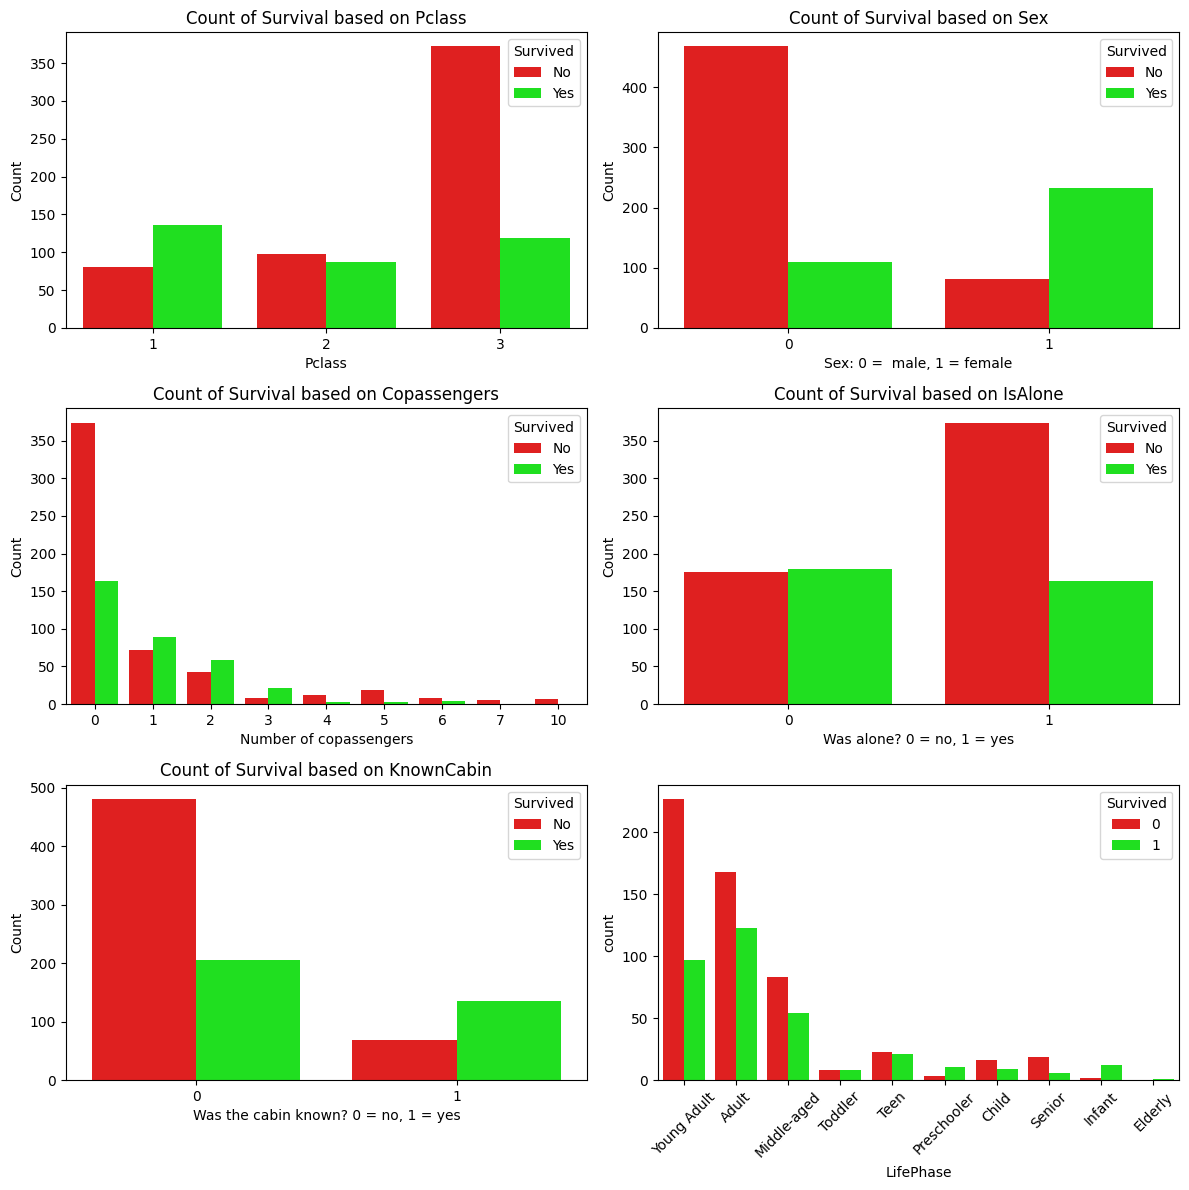

In [253]:
custom_palette = {0: 'red', 1: 'lime'}

plt.figure(figsize = (12,12))

plt.subplot(3,2,1)
sns.countplot(data=titanic_df, x='Pclass', hue='Survived', palette = custom_palette)
plt.title('Count of Survival based on Pclass')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['No', 'Yes'])

plt.subplot(3,2,2)
sns.countplot(data=titanic_df, x='Sex', hue='Survived', palette = custom_palette)
plt.title('Count of Survival based on Sex')
plt.xlabel('Sex: 0 =  male, 1 = female')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['No', 'Yes'])

plt.subplot(3,2,3)
sns.countplot(data=titanic_df, x='Copassengers', hue='Survived', palette = custom_palette)
plt.title('Count of Survival based on Copassengers')
plt.xlabel('Number of copassengers')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['No', 'Yes'])

plt.subplot(3,2,4)
sns.countplot(data=titanic_df, x='IsAlone', hue='Survived', palette = custom_palette)
plt.title('Count of Survival based on IsAlone')
plt.xlabel('Was alone? 0 = no, 1 = yes')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['No', 'Yes'])

plt.subplot(3,2,5)
sns.countplot(data=titanic_df, x='KnownCabin', hue='Survived', palette = custom_palette)
plt.title('Count of Survival based on KnownCabin')
plt.xlabel('Was the cabin known? 0 = no, 1 = yes')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['No', 'Yes'])

plt.subplot(3,2,6)
sns.countplot(data=titanic_df, x='LifePhase', hue='Survived', palette=custom_palette)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Wnioski z powyższych wizualizacji są następujące:


* najwięcej przypadków śmiertelnych było w trzeciej klasie, natomiast najwięcej ocalonych w pierwszej klasie;
* zdecydowanie więcej przypadków śmiertelnych mamy u mężczyzn (5/6 krotnie! więcej niż u kobiet), natomiast przeżyło ok. 2 razy więcej kobiet niż mężczyzn;
* najlepszą przeżywalność mają niemowlaki;
* liczba ocalonych samotnych podróżników jest podobna co tych z współpasażerami, natomiast ok. 2 razy więcej przypadków śmiertelnych mamy u samotnych podróżników.

# Heatmapa

In [254]:
titanic_heatmap = titanic_df.drop(columns=['SibSp', 'Parch', 'Copassengers', 'Pclass', 'LifePhase', 'Embarked'])

Przygotowałam odpowiednie kolumny pod macierz korelacji - te najbardziej znaczące, aby nie była za duża (chcę zachować jak największą czytelność heatmapy).

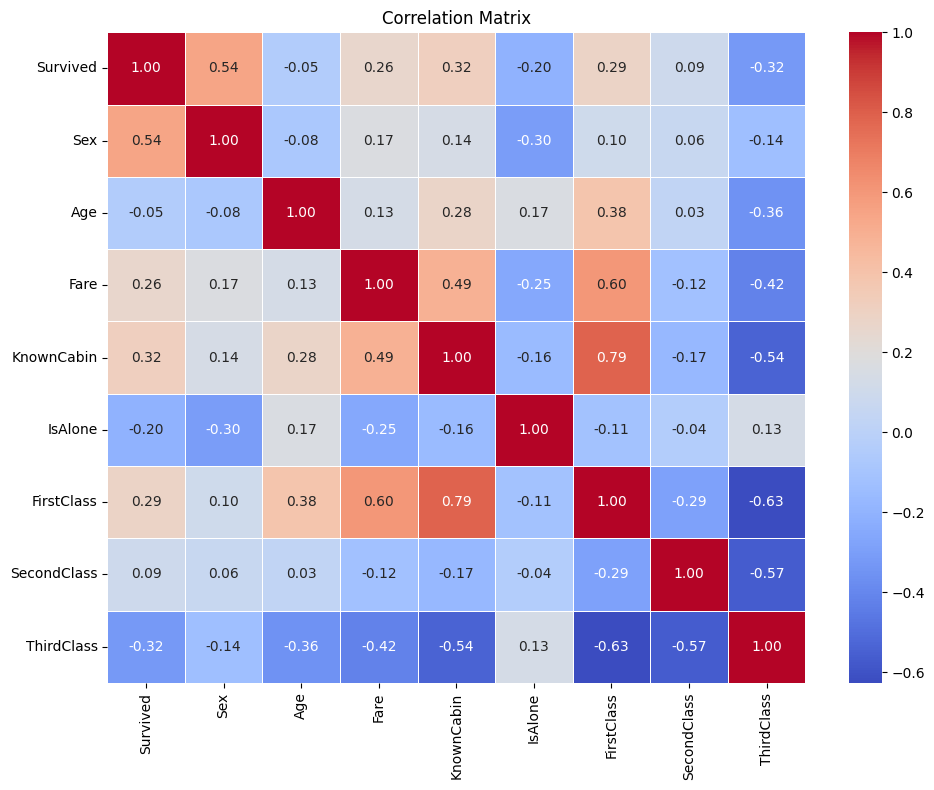

In [255]:
corr = titanic_heatmap.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Outliers

Teraz zajmę się zbadaniem obecności outlierów:

<Axes: xlabel='Pclass', ylabel='Fare'>

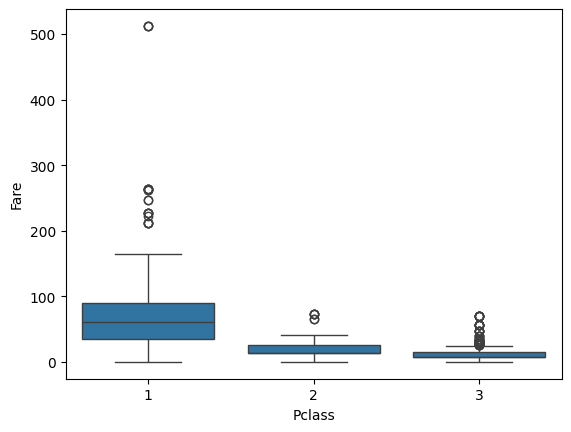

In [256]:
sns.boxplot(data=titanic_df, x='Pclass', y='Fare')

Jeśli chodzi o wartości odstające przy porównaniu zmiennych 'Pclass' i 'Fare'. Wartości odstające są tutaj oczywistością - na pewno w każdej z klas osobno byłu kabiny typu 'premium'. Płaciło się więcej za np. lepszy widok/wyższe piętro itd.

In [257]:
outliers_pclass1_fare = titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Fare'] > first_class['Fare'].quantile(0.75))]
outliers_pclass1_fare['Fare'].sort_values(ascending=False).head()

,Fare
PassengerId,
259,512.3292
680,512.3292
738,512.3292
28,263.0000
89,263.0000


Mamy trzy zdecydowanie droższe bilety. Myślę, że była to po prostu kabina 'turbopremiumsuper' z widokiem marzeń, ale pewnie standard i bezpieczeństwo podobne do tych kabin drogich, ale nie aż tak odstających. Zatem zmniejszę tę outliery do wartości tych outlierów z troszkę mniejszą wartością 'Fare'.

<Axes: xlabel='Pclass', ylabel='Fare'>

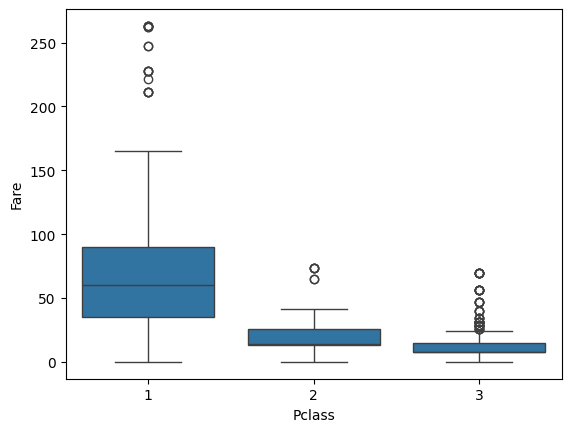

In [258]:
titanic_df = titanic_df[(titanic_df['Fare'] < 500)]
sns.boxplot(data=titanic_df, x='Pclass', y='Fare')

<Axes: xlabel='Pclass', ylabel='Age'>

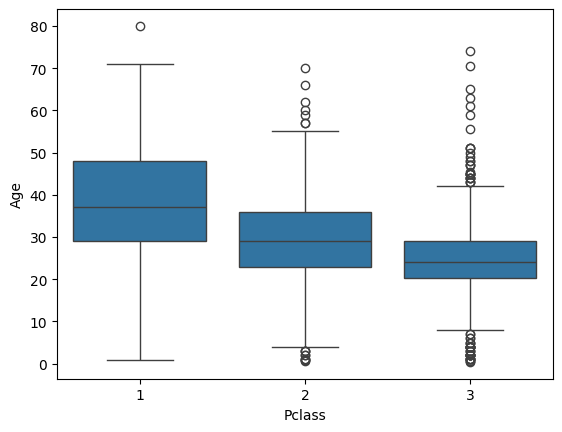

In [259]:
sns.boxplot(data=titanic_df, x='Pclass', y='Age')

Wiek podróżnych ze względu na klasy jest zróżnicowany, stąd spora ilość outlierów. Nie są to wartości abstrakcyjne (np. pasażer w wieku 200 lat) więc te outliery również bym zostawiła.

# Finalne dane

In [260]:
lifephase_map = {
    'Infant': 0,
    'Toodler': 1,
    'Preeschooler': 2,
    'Child': 3,
    'Teen': 4,
    'Young Adult': 5,
    'Adult': 6,
    'Miggle-aged': 7,
    'Senior': 8,
    'Elderly': 9
}
titanic_df['LifePhase'] = titanic_df['LifePhase'].map(lifephase_map)

/tmp/ipython-input-448537965.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['LifePhase'] = titanic_df['LifePhase'].map(lifephase_map)


In [261]:
titanic_final = titanic_df.drop(columns=['Name', 'Ticket', 'Cabin', 'Copassengers'])
titanic_final_ML = titanic_df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'Copassengers'])
titanic_final.to_csv('titanic_EDA.csv', index=False)
titanic_final_ML.to_csv('titanic_ML.csv', index=False)
titanic_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,KnownCabin,LifePhase,IsAlone,FirstClass,SecondClass,ThirdClass
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,Unknown,0,5.0,0,0,0,1
2,1,1,1,38.0,1,0,71.2833,1,C,1,6.0,0,1,0,0
3,1,3,1,26.0,0,0,7.9250,0,Unknown,0,6.0,1,0,0,1
4,1,1,1,35.0,1,0,53.1000,0,C,1,6.0,0,1,0,0
5,0,3,0,35.0,0,0,8.0500,0,Unknown,0,6.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,0,Unknown,0,6.0,1,0,1,0
888,1,1,1,19.0,0,0,30.0000,0,B,1,5.0,1,1,0,0
889,0,3,1,24.0,1,2,23.4500,0,Unknown,0,5.0,0,0,0,1


In [262]:
from google.colab import files
files.download('titanic_ML.csv')
files.download('titanic_EDA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>